In [1]:
#pip install mlxtend

In [2]:
#pip install imblearn

In [3]:
#pip install geopandas

In [4]:
#pip install category_encoders

In [5]:
#pip install xgboost

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
data = pd.read_csv("daft.csv")

In [8]:
data.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601


#### Data Explanation

##### Data Source : Daft.ie
* id: Property listing id used in the website
* title: property address.
* featuredLevel: ['featured' 'premium' 'standard']
* publishDate: published date for the listing.
* price: house price.
* numBedrooms: No. of bedrooms.
* numBathrooms: No. of bathroom.
* propertyType: ['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow' 
'Townhouse' 'Duplex' 'Site' 'Studio' 'House'.
* propertySize: Size of the property in meters squared
* category: ['Buy' 'New Homes'] (Buy means the houses listed under Buy menu in the websites)
* AMVprice: Advised minimum value (some properties have AMV price. The price column was mixed with regular price and AMV price, created a new column for AMV price to flag if it is AMV or not.)
* sellerId: Seller's Id
* sellername: Seller's name
* sellerbranch: Seller's branch if it is an agency.
* sellerType: ['BRANDEDAGENT' 'UNBRANDEDAGENT' 'PRIVATEUSER']
* m_totalImages: Total images posted on the website.
* m_hasVideo: Whether the property posted a video or not.
* m_hasVirtualTour: Whether the property has a virtual tour or not.
* m_hasBrochure: Whether the property has a brochure or not.
* longitude: Coordinate
* latitude: Coordinate
* ber_rating: ['C2' 'C1' 'A3' 'G' 'D2' 'B3' 'D1' 'C3' 'E1' 'SI666' 'F' 'E2' 'B2' 'XXX', 'A2,''B1' 'A1' 'A1A2']
(XXX means the rating was missing)
] 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


propertySize is missing around 355 values, which is around 10% of the total, hence dropping the records will impact the performance of our model therefore we need to fill the missing values with the median value.
If the data is heavily skewed or has outliers, the median is a better choice as it is robust to extreme values. The median represents the middle value and is less influenced by extreme observations.

#### Categorical Data
* featuredLevel, propertyType, category,  sellerType, seller_branch, seller_name, ber_rating, title, id, sellerId, m_hasVideo, m_hasBrochure, m_hasVirtualTour             
#### Numerical Data
Continouous:
* price, numBedrooms, numBathrooms, latitude, longitude, m_totalImages, AMV_price, , propertySize.

Disrete:
* publishDate

### Imputing missing values

In [10]:
for i in data[data.columns[data.isna().any()]].columns:
    print('- ',i)

-  propertySize


In [11]:
median_value = data['propertySize'].median() 
data['propertySize'].fillna(value=median_value, inplace=True)

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3967.0,3.629047e+06,250247.854757,10921.000000,3.654066e+06,3.673795e+06,3.685990e+06,3.695402e+06
price,3967.0,3.416734e+05,270358.241779,20000.000000,1.950000e+05,2.750000e+05,3.950000e+05,4.500000e+06
numBedrooms,3967.0,3.126292e+00,1.230570,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,2.300000e+01
numBathrooms,3967.0,2.077136e+00,1.167772,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,2.300000e+01
propertySize,3967.0,1.300184e+02,281.850312,1.000000,8.000000e+01,1.030000e+02,1.320000e+02,8.600000e+03
AMV_price,3967.0,4.739098e-02,0.212500,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sellerId,3967.0,2.163815e+04,254150.598747,7.000000,2.178000e+03,3.255000e+03,8.806000e+03,5.310328e+06
m_totalImages,3967.0,1.844895e+01,10.537226,0.000000,1.200000e+01,1.700000e+01,2.300000e+01,1.040000e+02
longitude,3967.0,-7.389964e+00,1.865587,-100.445882,-8.426627e+00,-7.050391e+00,-6.298945e+00,-6.028016e+00
latitude,3967.0,5.313382e+01,0.716435,39.783730,5.266612e+01,5.330335e+01,5.343872e+01,5.529969e+01


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3967 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


#### Price Distribution

C:\Users\Ali\AppData\Local\Temp\ipykernel_66032\984603188.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}€'.format(np.exp(x)) for x in current_values])


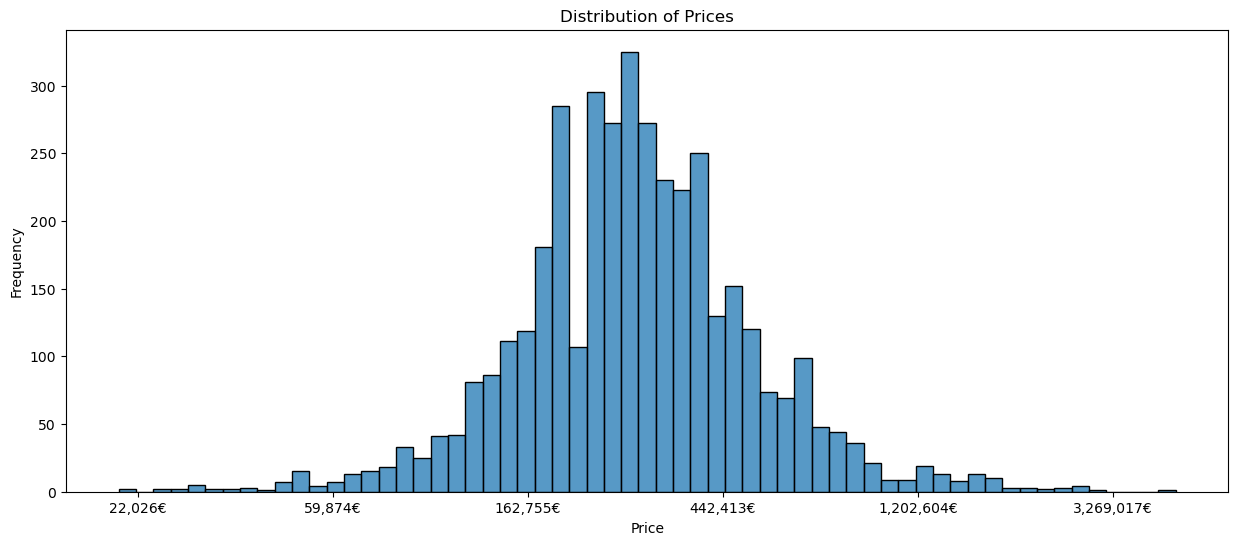

In [14]:
plt.figure(figsize=(15, 6))
p = np.log(data['price'])
sns.histplot(p, kde=False)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}€'.format(np.exp(x)) for x in current_values])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

* Majority of the house pricing is under half a million. With a few houses being nearly 3 million!
* Price is heavily right skewed

#### Price vs Size of property

<Axes: xlabel='price', ylabel='propertySize'>

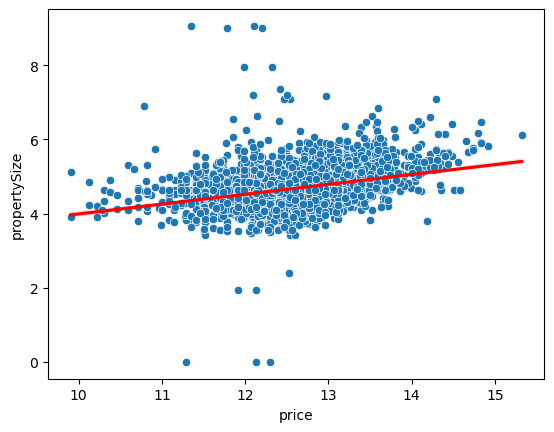

In [15]:
ps = np.log(data['propertySize'])
p = np.log(data['price'])
ax = sns.scatterplot(data=data, x=p, y=ps)
sns.regplot(data=data, x=p, y=ps, scatter=False, ax=ax, color = 'red')

* In the cluster, a weak trend of increasing prices with increasing property size can be seen. However, there are few records where the property size has increased but the price is still near the lowest. This could indicate errors in the data.

#### Number of Bedrooms vs Price

<Axes: xlabel='numBedrooms', ylabel='price'>

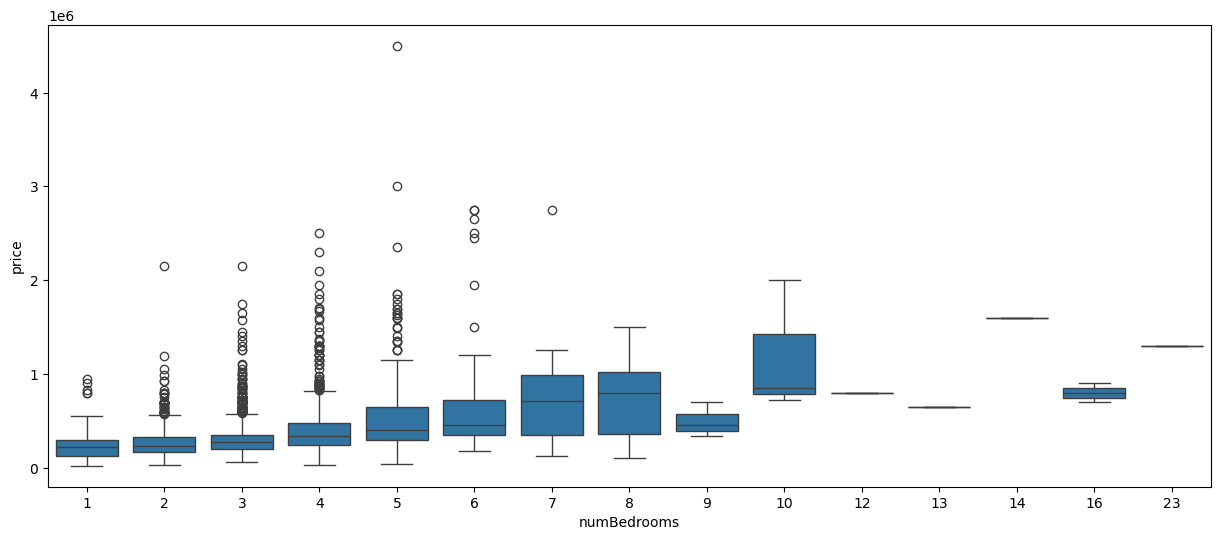

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x="numBedrooms", y="price")

* We can see that the prices tend to go up with the number of bedrooms.
* The price variance in houses with lower number of bedrooms is lower as compared to the variance in prices of houses with high number of bedrooms.
* Visible values that are outside of the 75th percentile.

In [17]:
grouped_data = data.groupby('ber_rating')['price'].mean().reset_index()

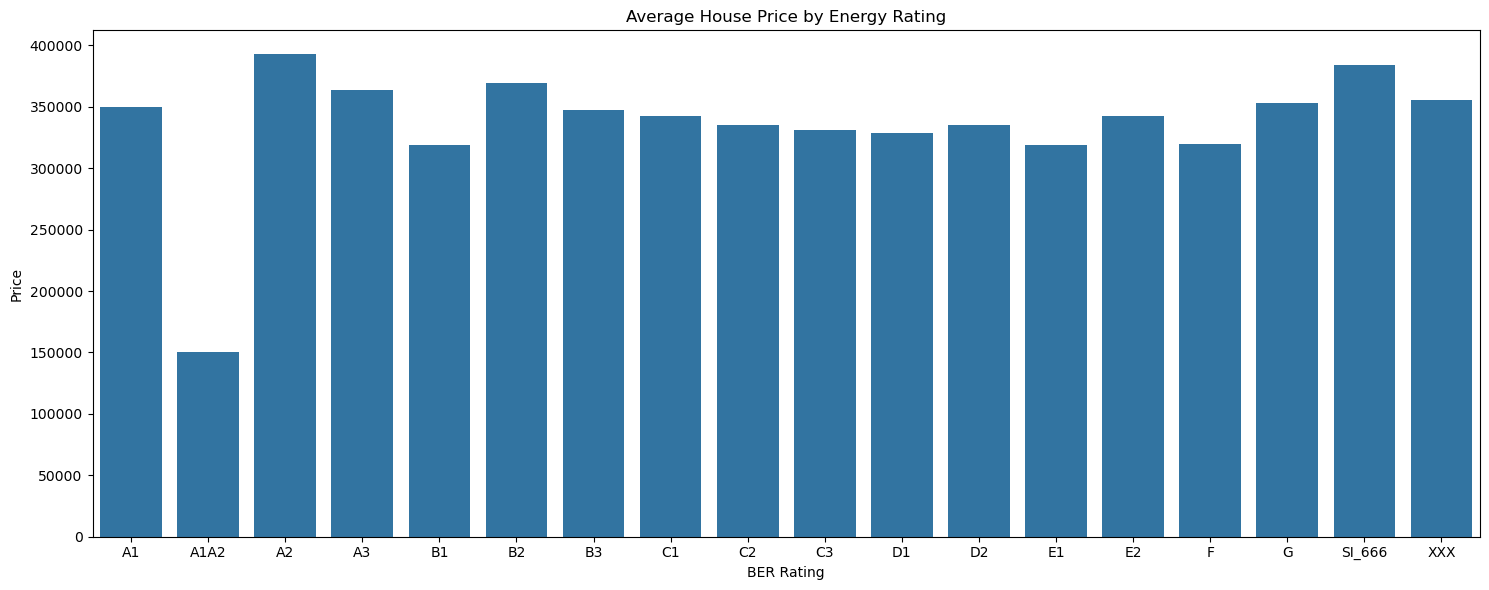

In [18]:
plt.figure(figsize=(15, 6))
sns.barplot(x='ber_rating', y='price', data=grouped_data)
plt.xlabel('BER Rating')
plt.ylabel('Price')
plt.title('Average House Price by Energy Rating')
plt.tight_layout()

* According to https://www.seai.ie/home-energy/building-energy-rating-ber/understand-a-ber-rating , Sl_666 and XXX are possible errors.
* The average size house rating in ireland is D2, we can see that prices take a dip around this area which shows market competition.
* The price of A1A2 rated house seems lower than the average, considering A1A2 is not a real rating, this will be explored further.

#### Price Trends Respective to the Type of Property

<Axes: xlabel='propertyType', ylabel='price'>

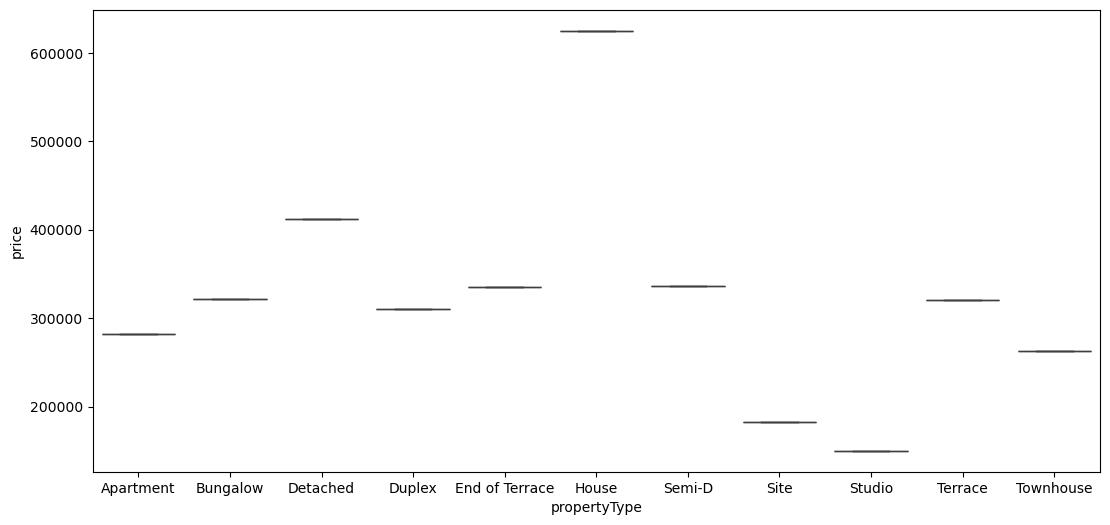

In [19]:
plt.figure(figsize=(13, 6))
grouped_data = data.groupby('propertyType')['price'].mean().reset_index()
sns.boxplot(x='propertyType',y='price',data=grouped_data)

* As per daft.ie, a 'House' is any property irrelevant of its type. Following this, the average price for a 'house' should be in the middle of all other values, but in the figure above, it is the highest averaging type, this shows rare records or possibly outliers
* Detached houses are the most costly, whereas studios are the cheapest to buy.

#### Biggest Market Share By Investor

In [20]:
grouped_data = data.groupby('seller_branch')['price'].sum().reset_index()
grouped_data = grouped_data.sort_values(by=['price'], ascending=False)
top_5 = grouped_data.head(5)

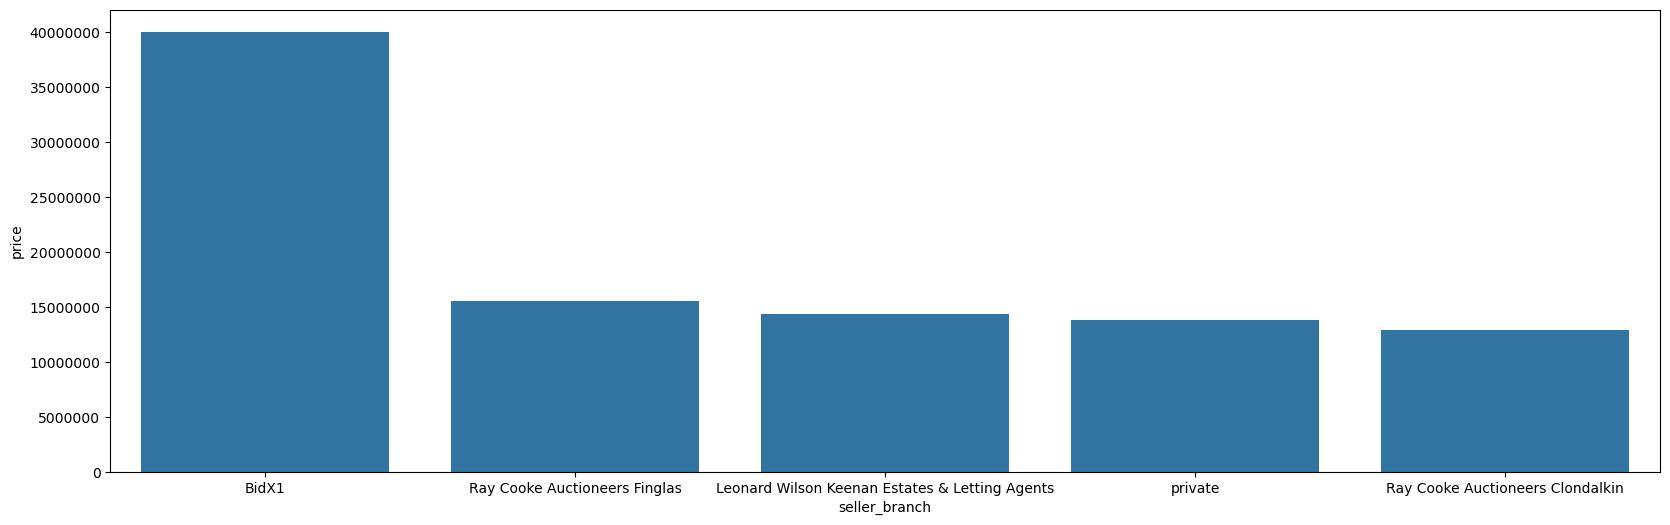

In [21]:
plt.figure(figsize=(20, 6))
sns.barplot(top_5, x="seller_branch", y="price")
plt.ticklabel_format(style='plain', axis='y')

* BidX1 has the largest market share of 40 million!
* Private owners have the 4th highest share of properties.

### Feature Engineering

* Converting Date to DateTime and splitting into Year and Month

In [22]:
data['publishDate'] = pd.to_datetime(data['publishDate'])

In [23]:
data['year'] = data['publishDate'].dt.year
data['month'] = data['publishDate'].dt.month

data.drop(['publishDate'], axis=1, inplace = True)

* Using clustering to replace latitude and longitude with a location cluster as the co-ordinates themselves do not present any usability for ML according to the source below.

https://heartbeat.comet.ml/working-with-geospatial-data-in-machine-learning-ad4097c7228d

In [24]:
coords = pd.DataFrame()
coords['longitude'] = data['longitude']
coords['latitude'] = data['latitude']

In [25]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(data[['longitude','latitude']])
data['zone'] = clusters
data.drop(['latitude', 'longitude'], axis=1, inplace = True)

C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


* Extracting county and Town from Address.

In [26]:
def getCounty(title):
    address_parts = title.split(',')
    return address_parts[-1].strip()

In [27]:
def getTown(title):
    address_parts = title.split(',')
    return address_parts[-2].strip()

In [28]:
data['county'] = data['title'].apply(getCounty)

In [29]:
data['town'] = data['title'].apply(getTown)

In [30]:
data.drop(['title'], axis=1, inplace = True)

In [31]:
data['county'] = data['county'].str.replace('Co. ', '')

In [32]:
data['county'] = data['county'].str.extract(r'([a-zA-Z]+)')

In [33]:
data['town'] = data['town'].str.extract(r'([a-zA-Z]+)')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   featuredLevel     3967 non-null   object 
 2   price             3967 non-null   int64  
 3   numBedrooms       3967 non-null   int64  
 4   numBathrooms      3967 non-null   int64  
 5   propertyType      3967 non-null   object 
 6   propertySize      3967 non-null   float64
 7   category          3967 non-null   object 
 8   AMV_price         3967 non-null   int64  
 9   sellerId          3967 non-null   float64
 10  seller_name       3967 non-null   object 
 11  seller_branch     3967 non-null   object 
 12  sellerType        3967 non-null   object 
 13  m_totalImages     3967 non-null   float64
 14  m_hasVideo        3967 non-null   bool   
 15  m_hasVirtualTour  3967 non-null   bool   
 16  m_hasBrochure     3967 non-null   bool   


* id and sellerId as it is a daft.ie listing identifier and the ML model may interpret this as a mathematical input.
* Example: If a house with id 1 is priced at 200,000 and another house with id 45 is priced at 500,000 the machine learning model might
interpret this as if the id goes up, the price will also go up, which is completely incorrect. 

In [35]:
data.drop(['id'], axis=1, inplace = True)

In [36]:
data.drop(['sellerId'], axis=1, inplace = True)

### Distribution of data

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'numBedrooms'}>,
        <Axes: title={'center': 'numBathrooms'}>],
       [<Axes: title={'center': 'propertySize'}>,
        <Axes: title={'center': 'AMV_price'}>,
        <Axes: title={'center': 'm_totalImages'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'zone'}>]], dtype=object)

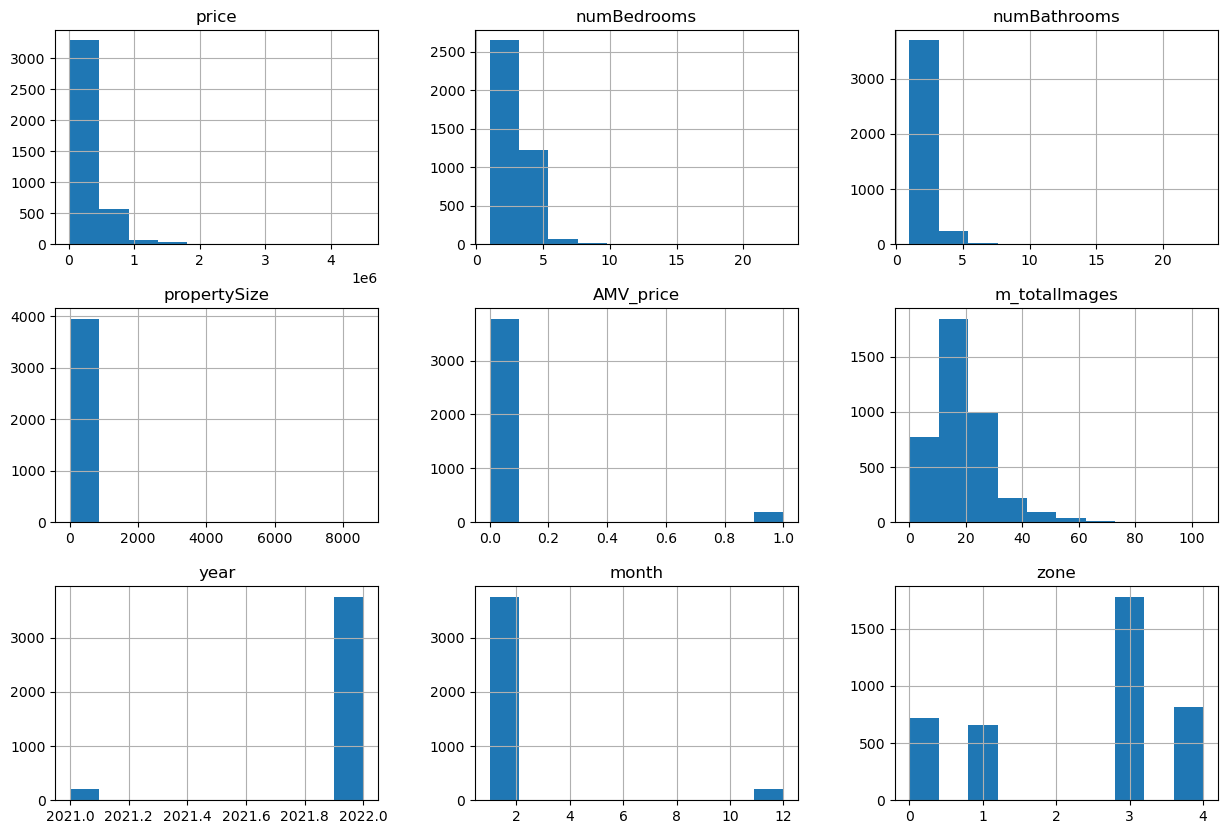

In [37]:
data.hist(figsize=(15,10))

* Data is skewed and unbalanced.

### Test Train Split

https://onlinelibrary.wiley.com/doi/full/10.1002/sam.11583
* According to this study, the best test to train split ratio is the square root of number of features to 1. We have 22 features which gives us around 4.6:1 , which means the best split is 75/25.

In [38]:
X = data.drop(['price'], axis=1)
y = data['price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [40]:
train_data = X_train.join(y_train)

### Encodings

In [41]:
def encode(df):
    df['propertyType'].replace(['End of Terrace', 'Bungalow', 'Townhouse', 'Duplex', 'Site', 'House', 'Studio'], 'Other', inplace=True)
    df  = pd.get_dummies(df, columns = ['propertyType'], dtype=float)
    df  = pd.get_dummies(df, columns = ['category'], dtype=float)
    df  = pd.get_dummies(df, columns = ['sellerType'], dtype=float)
    
    featuredLevels = ['standard', 'premium', 'featured']
    ber_ratings = ['XXX', 'SI_666', 'G', 'F', 'E2', 'E1', 'D2', 'D1', 'C3', 'C2', 'C1', 'B3', 'B2', 'B1', 'A3', 'A2', 'A1A2', 'A1']
    
    
    encoder = OrdinalEncoder(categories=[featuredLevels, ber_ratings])
    df[['featuredLevel', 'ber_rating']] = encoder.fit_transform(df[['featuredLevel', 'ber_rating']]) 
    
    #df['county'] = df['county'].where(df['county'].isin(['Dublin', 'Limerick', 'Kildare', 'Galway', 'Louth', 'Cork', 'Mayo', 'Westmeath', 'Wexford', 'Kerry', 'Meath', 'Donegal', 'Roscommon', 'Wicklow', 'Waterford', 'Tipperary', 'Clare', 'Laois', 'Offaly', 'Kilkenny', 'Sligo', 'Cavan', 'Carlow', 'Leitrim', 'Longford', 'Monaghan']), other='Other')
    df['county'] = df['county'].where(df['county'].isin(['Dublin']), other='Other')
    df  = pd.get_dummies(df, columns = ['county'], dtype=float)
    
    encoder = ce.LeaveOneOutEncoder(cols=['town'])
    data_encoded = encoder.fit_transform(df['town'], df['price'])
    df = df.merge(data_encoded, how = 'left', left_index=True, right_index=True)
    df.drop(['town_x'], axis=1, inplace = True)     
    
    encoder = ce.LeaveOneOutEncoder(cols=['seller_branch'])
    data_encoded = encoder.fit_transform(df['seller_branch'], df['price'])
    df = df.merge(data_encoded, how = 'left', left_index=True, right_index=True)
    df.drop(['seller_branch_x'], axis=1, inplace = True)

    
    df.drop(['seller_name'], axis=1, inplace = True)
    df[['m_hasVideo','m_hasVirtualTour', 'm_hasBrochure']] = df[['m_hasVideo','m_hasVirtualTour', 'm_hasBrochure']].astype(float)
           
    return df

* Encoding test and train data seperately to prevent data leak and overfitting.
* https://datascience.stackexchange.com/questions/107714/encoding-before-vs-after-train-test-split

In [42]:
train_data = encode(train_data)

test_data = X_test.join(y_test)
test_data = encode(test_data)

<Axes: >

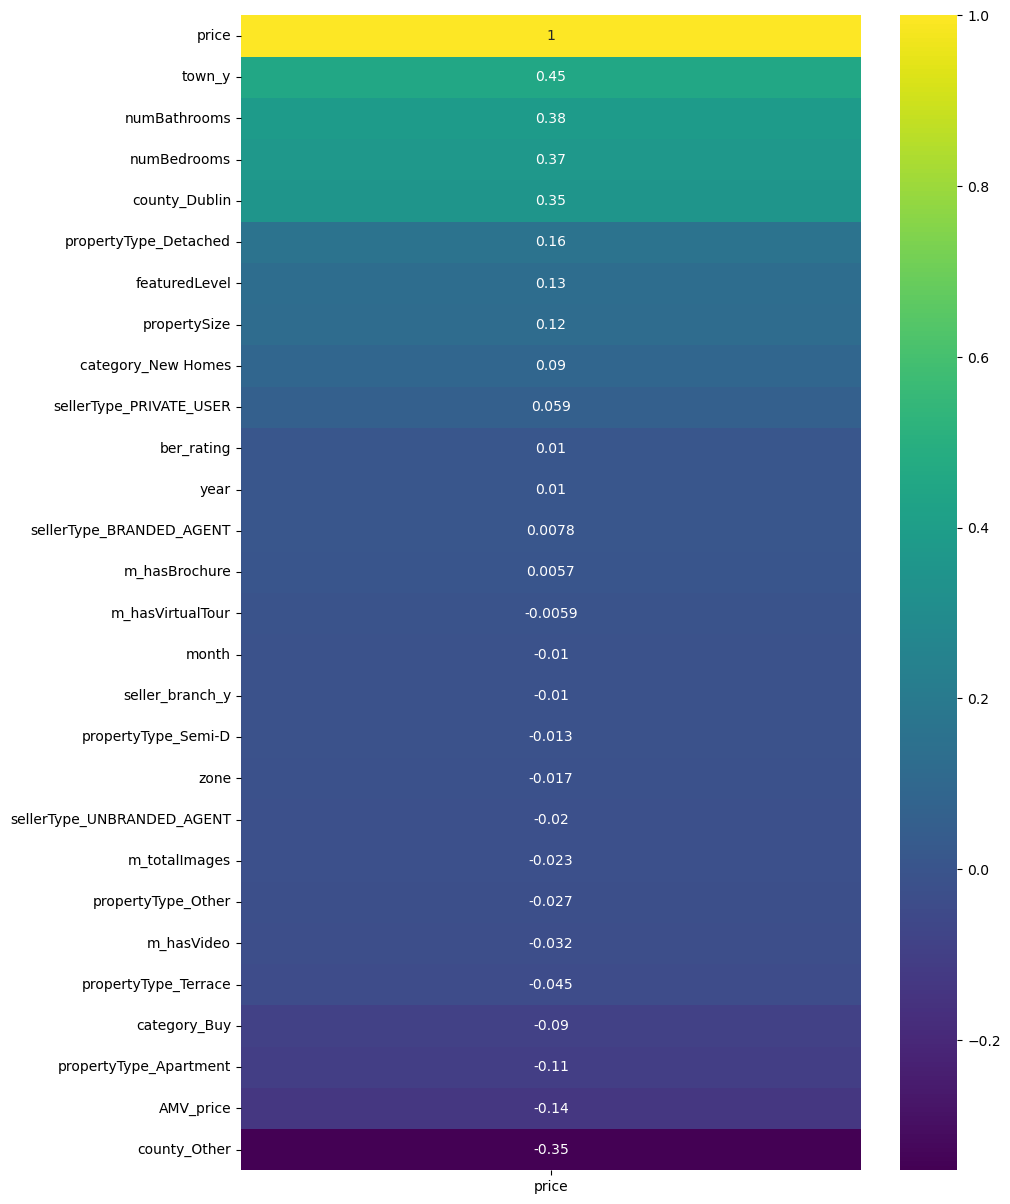

In [43]:
plt.figure(figsize=(10, 15))
sns.heatmap(train_data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='viridis')

C:\Users\Ali\AppData\Local\Temp\ipykernel_66032\689228211.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


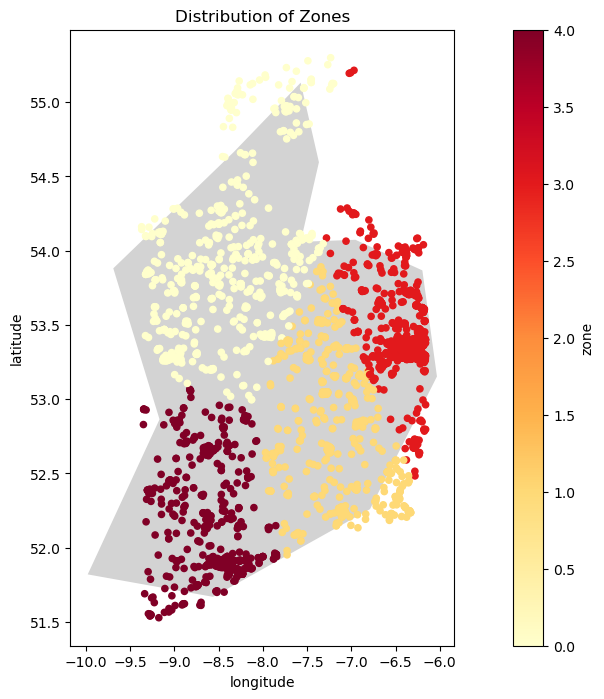

In [44]:
data = data.join(coords)
fig, ax = plt.subplots(figsize=(15,8))

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Ireland"].plot(color="lightgrey", ax=ax)
min_longitude = data['longitude'].quantile(0.05)
max_longitude = data['longitude'].quantile(0.95)

filtered_data = data[(data['longitude'] >= min_longitude) & (data['longitude'] <= max_longitude)]

filtered_data.plot(x='longitude', y='latitude', kind="scatter", c="zone", colormap="YlOrRd",
title="Distribution of Zones", ax=ax)
plt.show()

### Normalizing Data

* Normalizing the whole sets including target variable provides a better fit and increases the R2 scores by 6% in our case.
* Will need to transform the output.
* Otherwise, datasets can be normalized except the target variable.

In [45]:
from sklearn.preprocessing import normalize

train_data['propertySize'] = np.log(train_data['propertySize']+1)
train_data['numBedrooms'] = np.log(train_data['numBedrooms']+1)
train_data['numBathrooms'] = np.log(train_data['numBathrooms']+1)

orig_train = train_data.astype(float)
f = normalize(train_data, norm="l2")
train_data = pd.DataFrame(data=f, columns=train_data.columns)


test_data['propertySize'] = np.log(test_data['propertySize']+1)
test_data['numBedrooms'] = np.log(test_data['numBedrooms']+1)
test_data['numBathrooms'] = np.log(test_data['numBathrooms']+1)

orig_test = test_data.astype(float)
f = normalize(test_data, norm="l2")
test_data = pd.DataFrame(data=f, columns=test_data.columns)

# Replace target variables with original values.
train_data['price'] = orig_train['price'].values
test_data['price'] = orig_test['price'].values

### Feature Selection - SelectKBest

In [46]:
# Split to allow KBest to select params.
X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']
X_test, y_test = test_data.drop(['price'], axis=1), test_data['price']

In [47]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=8)

fs.fit_transform(X_train, y_train)
cols_from_k=X_train.columns[fs.get_support(indices=True)]

In [48]:
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': fs.scores_})
top_features = feature_scores.nlargest(7, 'Score')

<BarContainer object of 7 artists>

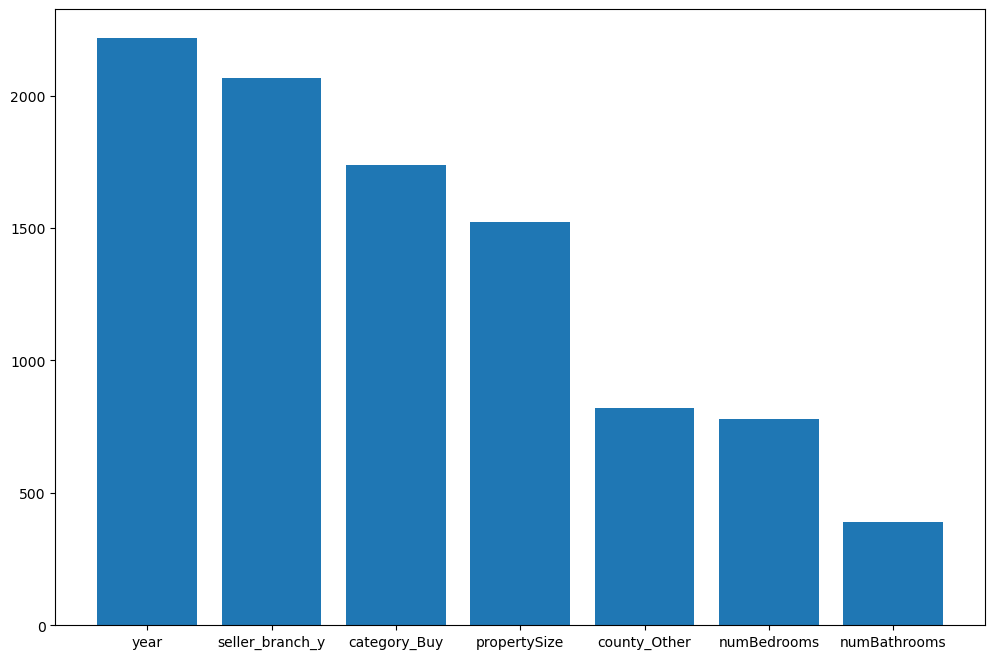

In [49]:
plt.figure(figsize=(12, 8))
plt.bar(top_features['Feature'], top_features['Score'])

In [50]:
X_train = train_data[cols_from_k]
X_test = test_data[cols_from_k]

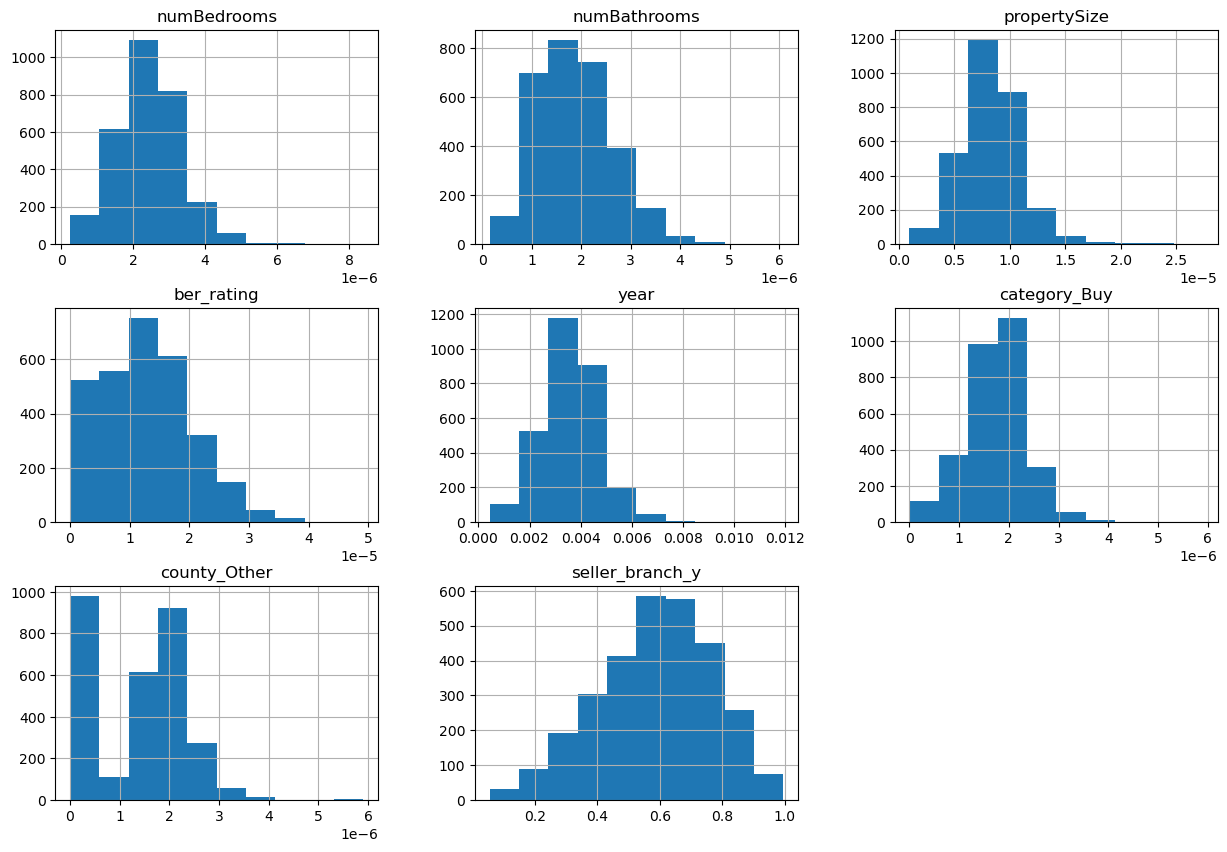

In [51]:
X_train.hist(figsize=(15,10));

### Model Selection

#### Creating Evaluation Table
https://www.kaggle.com/code/trishaanbukumar/house-price-predictions

In [52]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [53]:
evals = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [56]:
y_pred = reg.predict(X_test_s)

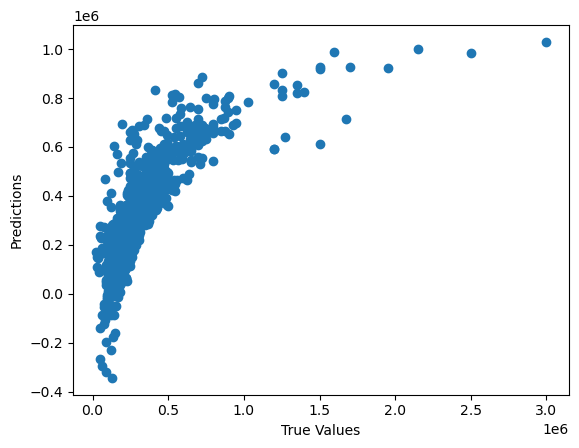

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.show()

In [58]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [59]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 96890.85167531138
MSE: 27017422081.01172
RMSE: 164369.77240664331
R2 Score: 0.5790014231566154
------------------------------


In [60]:
new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_66032\2724288395.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)


## Random Forest Regression

In [61]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 5,  max_depth = 100)

forest.fit(X_train_s, y_train)

RandomForestRegressor(max_depth=100, n_estimators=5)

In [62]:
y_pred = forest.predict(X_test_s)

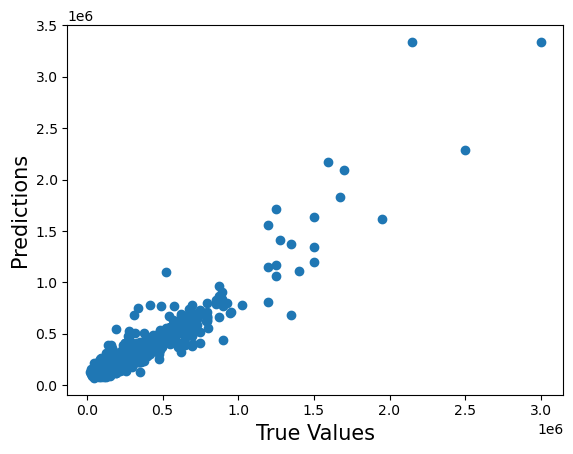

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

In [64]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [65]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 57125.04133064516
MSE: 9230766273.993025
RMSE: 96076.87689549981
R2 Score: 0.8561617221335037
------------------------------


In [66]:
new_row = {"Model": "Random Forest","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

## SVR

In [67]:
svr = SVR(C=50000)
svr.fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)

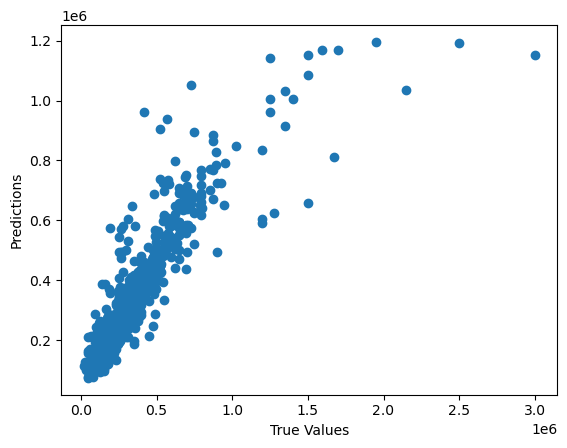

In [68]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.show()

In [69]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [70]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 59998.321613413566
MSE: 16517547473.46469
RMSE: 128520.61108423305
R2 Score: 0.7426155627128109
------------------------------


In [71]:
new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

## XGBoost Regressor

In [72]:
xgb = XGBRegressor()
xgb.fit(X_train_s, y_train)
y_pred = xgb.predict(X_test_s)

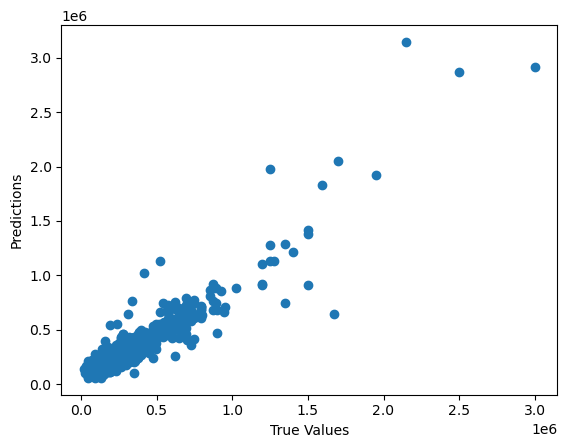

In [73]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.show()

In [74]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [75]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 55050.31516979587
MSE: 9552215914.329866
RMSE: 97735.4383748795
R2 Score: 0.8511527379046294
------------------------------


In [76]:
new_row = {"Model": "XGBoost","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

----------------

## Lasso Regression

In [77]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_s, y_train)
y_pred = lasso.predict(X_test_s)

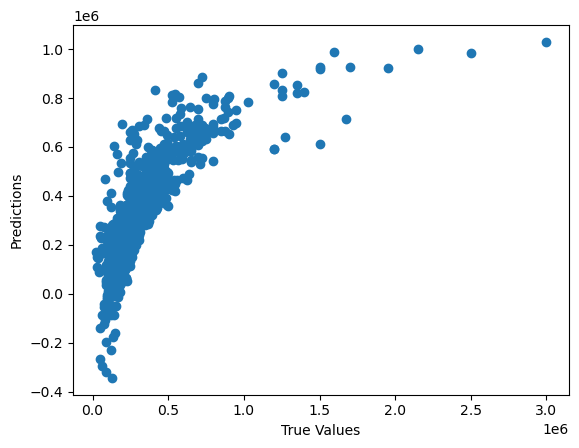

In [78]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.show()

In [79]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [80]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 96889.92294703975
MSE: 27017291131.57984
RMSE: 164369.37406822428
R2 Score: 0.5790034636741856
------------------------------


In [81]:
new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

------------------

## Elastic Net

In [82]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X_train_s, y_train)
y_pred = elastic_net.predict(X_test_s)

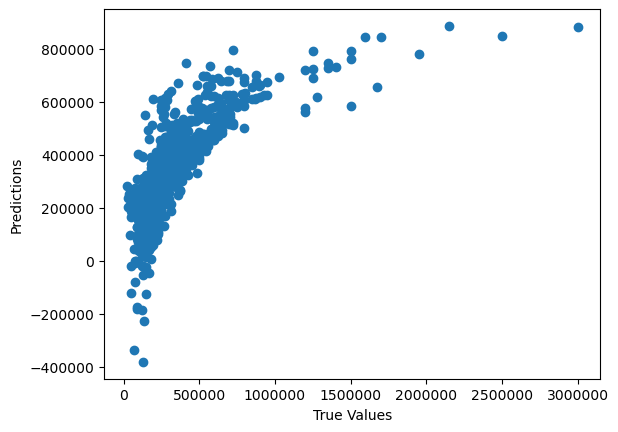

In [83]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [84]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

In [85]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 97109.02899352193
MSE: 29469562085.54561
RMSE: 171667.0093103087
R2 Score: 0.5407909880886801
------------------------------


In [86]:
new_row = {"Model": "Elastic","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

------------------------------

## Model Comparison

In [87]:
evals.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
3,XGBoost,55050.315170,9.552216e+09,97735.438375,0.851153
1,Random Forest,57125.041331,9.230766e+09,96076.876895,0.856162
2,SVR,59998.321613,1.651755e+10,128520.611084,0.742616
4,Lasso,96889.922947,2.701729e+10,164369.374068,0.579003
0,LinearRegression,96890.851675,2.701742e+10,164369.772407,0.579001
5,Elastic,97109.028994,2.946956e+10,171667.009310,0.540791


-----------------------------

## Hyper Parameter Tuning

* Applied to top 3 models from above.

## XGB

In [88]:
from sklearn.model_selection import GridSearchCV 

parameters = {'nthread':[10],
              'max_depth': [12, 18, 24,30],
              'min_child_weight': [4,10,16],
              'n_estimators': [200, 400, 600]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train_s, y_train) 

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'max_depth': [12, 18, 24, 30],
                         'min_child_weight': [4, 10, 16],
                         'n_estimators': [200, 400, 600], 'nthread': [10]},
             verbose=True)

In [89]:
grid_predictions = xgb_grid.predict(X_test_s) 

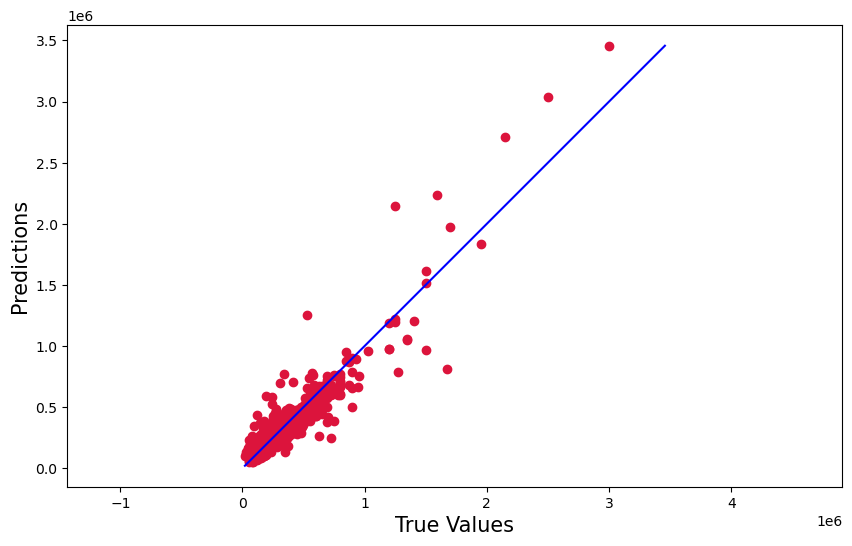

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, grid_predictions, c='crimson')

p1 = max(max(grid_predictions), max(y_test))
p2 = min(min(grid_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [91]:
mae, mse, rmse, r_squared = evaluation(y_test, grid_predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 57554.39666157384
MSE: 9930441184.117434
RMSE: 99651.59900431821
R2 Score: 0.8452590482761625
------------------------------


In [92]:
new_row = {"Model": "XGB_HT","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

## SVR

In [93]:
param_grid = {'C': [10000, 50000, 100000, 1000000],  
              'gamma': [0.1, 0.01, 0.001, 0.0001]}  
  
svr_grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
svr_grid.fit(X_train_s, y_train)
grid_predictions = svr_grid.predict(X_test_s)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ................C=10000, gamma=0.1;, score=0.569 total time=   0.1s
[CV 2/5] END ................C=10000, gamma=0.1;, score=0.577 total time=   0.1s
[CV 3/5] END ................C=10000, gamma=0.1;, score=0.708 total time=   0.1s
[CV 4/5] END ................C=10000, gamma=0.1;, score=0.568 total time=   0.1s
[CV 5/5] END ................C=10000, gamma=0.1;, score=0.489 total time=   0.1s
[CV 1/5] END ...............C=10000, gamma=0.01;, score=0.500 total time=   0.1s
[CV 2/5] END ...............C=10000, gamma=0.01;, score=0.508 total time=   0.1s
[CV 3/5] END ...............C=10000, gamma=0.01;, score=0.613 total time=   0.1s
[CV 4/5] END ...............C=10000, gamma=0.01;, score=0.502 total time=   0.1s
[CV 5/5] END ...............C=10000, gamma=0.01;, score=0.441 total time=   0.1s
[CV 1/5] END ..............C=10000, gamma=0.001;, score=0.265 total time=   0.1s
[CV 2/5] END ..............C=10000, gamma=0.001;

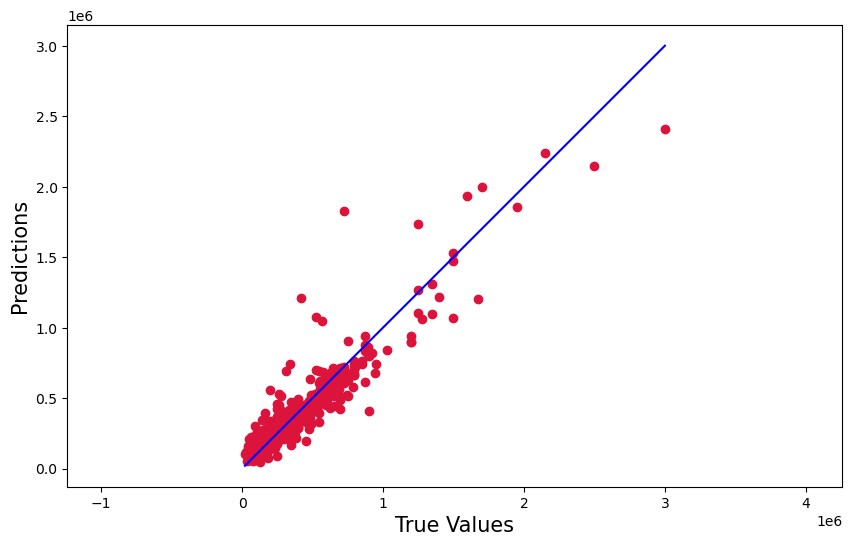

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, grid_predictions, c='crimson')

p1 = max(max(grid_predictions), max(y_test))
p2 = min(min(grid_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [95]:
mae, mse, rmse, r_squared = evaluation(y_test, grid_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 52506.94961943953
MSE: 8605183924.46456
RMSE: 92764.13059186487
R2 Score: 0.865909849769816
------------------------------


In [96]:
new_row = {"Model": "SVR_HT","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

## Random Forest

In [97]:
n_estimators = [20,40,80]
max_depth = [10,20,40, 80]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
 
rf_grid.fit(X_train_s, y_train) 
grid_predictions = rf_grid.predict(X_test_s)

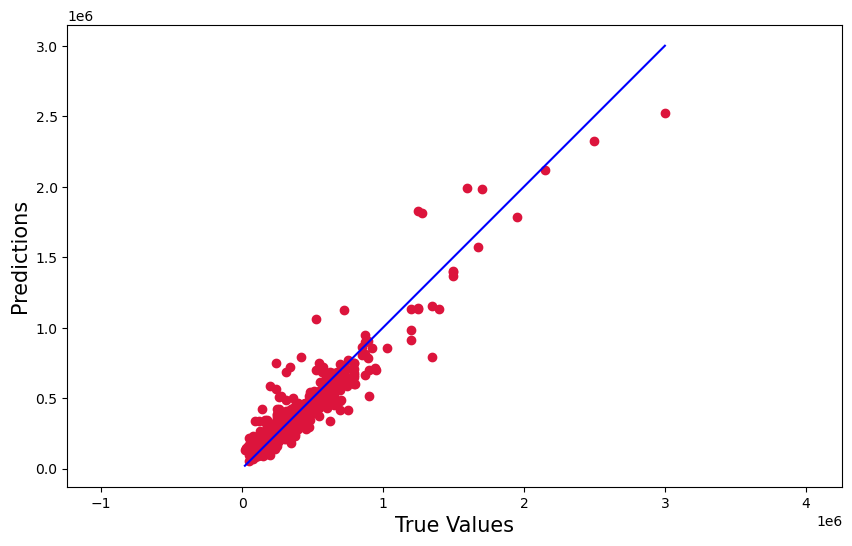

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, grid_predictions, c='crimson')
p1 = max(max(grid_predictions), max(y_test))
p2 = min(min(grid_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [99]:
mae, mse, rmse, r_squared = evaluation(y_test, grid_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 52259.7952998992
MSE: 7281732197.590777
RMSE: 85333.06626150719
R2 Score: 0.8865325165758534
------------------------------


In [100]:
new_row = {"Model": "RandomForest_HT2","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

In [101]:
evals.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
8,RandomForest_HT2,52259.795300,7.281732e+09,85333.066262,0.886533
7,SVR_HT,52506.949619,8.605184e+09,92764.130592,0.865910
3,XGBoost,55050.315170,9.552216e+09,97735.438375,0.851153
1,Random Forest,57125.041331,9.230766e+09,96076.876895,0.856162
6,XGB_HT,57554.396662,9.930441e+09,99651.599004,0.845259
2,SVR,59998.321613,1.651755e+10,128520.611084,0.742616
4,Lasso,96889.922947,2.701729e+10,164369.374068,0.579003
0,LinearRegression,96890.851675,2.701742e+10,164369.772407,0.579001
5,Elastic,97109.028994,2.946956e+10,171667.009310,0.540791


## Saving Model for Deployment

In [102]:
import pickle

In [103]:
pickle.dump(rf_grid, open('rf.pkl', 'wb'))

In [104]:
pickle.dump(svr_grid, open('svr.pkl', 'wb'))

#### Provides the features that were used by the models so we can translate them over to designing the interface.

In [105]:
X_train.columns

Index(['numBedrooms', 'numBathrooms', 'propertySize', 'ber_rating', 'year',
       'category_Buy', 'county_Other', 'seller_branch_y'],
      dtype='object')

#### Provides the mean value for seller_branch, as it was LOO encoded earlier, we can use the hard coded mean for user input.

In [106]:
for arr in X_train_s:
    values = arr[-1]
values.mean()

0.8238180958454899